In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline

In [3]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [4]:
# time ms in msec, latency us in nsec.
base_path = '/scratch/ashlie/fio_devs/randwrite/q1'
files = [
    'bs512/_lat.1.log',
    'bs4096/_lat.1.log',
    'bs8192/_lat.1.log',
]
devs = [
    'spdk',
    'spdk_bdev',
    'libaio',
    'sync_nvme',
    'sync_ramdisk',
]

In [5]:
allpaths = {}

for dev in devs:
    bp = os.path.join(base_path, dev)
    lat_files = []
    for f in files:
        lat_files.append(os.path.join(bp, f))
    allpaths[dev] = lat_files

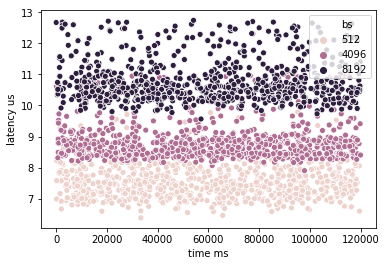

In [6]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['spdk']), hue='bs', legend='full')

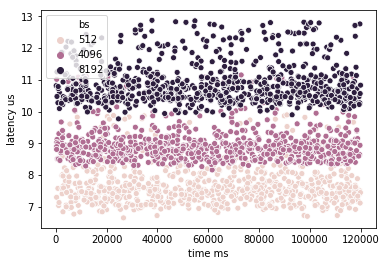

In [7]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['spdk_bdev']), hue='bs', legend='full')

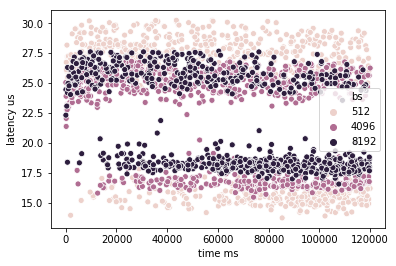

In [8]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['libaio']), hue='bs', legend='full')

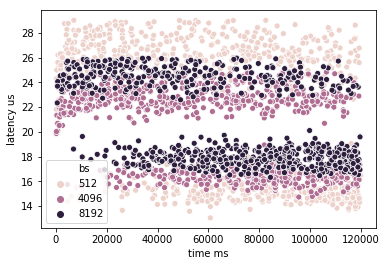

In [9]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['sync_nvme']), hue='bs', legend='full')

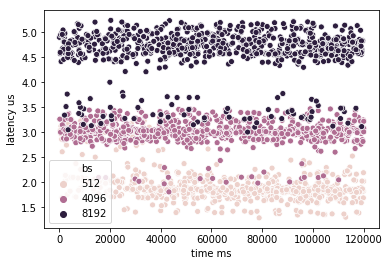

In [10]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['sync_ramdisk']), hue='bs', legend='full')

In [20]:
spdkdfs = ph.read_files(allpaths['spdk'])
min_by_bs = ph.min_by_bs(spdkdfs)
print(min_by_bs)
max_by_bs = ph.max_by_bs(spdkdfs)
print(max_by_bs)

{512: 6.323, 4096: 7.747, 8192: 9.27}
{512: 3578.039, 4096: 3743.665, 8192: 3649.094}


In [40]:
#tmp512 = spdkdfs[0][spdkdfs[0]['latency us'] >= spdkdfs[0]['latency us'].quantile(0.95)]
#spdkdfs[0]['latency us'].groupby(spdkdfs[0]['time ms']).count() - tmp512['latency us'].groupby(tmp512['time ms']).count()

In [39]:
#blah = tmp512[tmp512['latency us'] < 200]
#sns.scatterplot(x='time ms', y='latency us', data=ph.downsample([blah])[0])

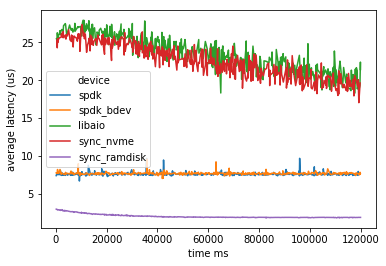

In [41]:
lineplot = pd.DataFrame()

for dev in devs:
    bp = os.path.join(base_path, dev)
    lat_files = []
    for f in files:
        if '512' in f:
            lf = os.path.join(bp, f)
            df = ph.read_files([lf])[0]
            df = df[df['latency us'] < df['latency us'].quantile(0.95)]
            avged_df = df['latency us'].groupby(df['time ms']).mean().to_frame(name='average latency (us)').reset_index()
            avged_df['device'] = dev
            lineplot = lineplot.append(ph.downsample([avged_df], num_samples=500)[0])

sns.lineplot(x='time ms', y='average latency (us)', data=lineplot, hue='device')

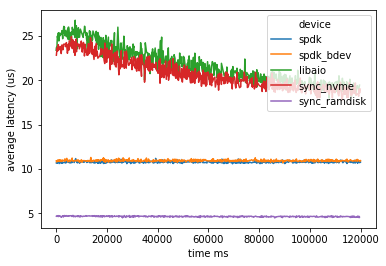

In [42]:
lineplot = pd.DataFrame()

for dev in devs:
    bp = os.path.join(base_path, dev)
    lat_files = []
    for f in files:
        if '8192' in f:
            lf = os.path.join(bp, f)
            df = ph.read_files([lf])[0]
            df = df[df['latency us'] < df['latency us'].quantile(0.95)]
            avged_df = df['latency us'].groupby(df['time ms']).mean().to_frame(name='average latency (us)').reset_index()
            avged_df['device'] = dev
            lineplot = lineplot.append(ph.downsample([avged_df])[0])

sns.lineplot(x='time ms', y='average latency (us)', data=lineplot, hue='device')